<a href="https://colab.research.google.com/github/jinwoo3239/DeepLearning_study/blob/main/basic_tensorflow_quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref: https://www.tensorflow.org/tutorials/quickstart/advance

Ref: https://www.tensorflow.org/tutorials/quickstart/beginner

# Tensorflow quickstart tutorial

In [105]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import datasets

from tensorflow.keras import Model, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical

In [66]:
print(tf.__version__)

2.8.2


## Beginner

In [67]:
mnist = datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)

(60000, 28, 28)


In [68]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [98]:
model = Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# model = Sequential([layers.Flatten(),
#                     layers.Dense(128),
#                     layers.Dense(10)])

In [99]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [100]:
# loss_fn = tf.keras.losses.CategoricalCrossentropy() # y_train to one_hot_encoding
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]

model.compile(optimizer='rmsprop', loss=loss_fn, metrics=['accuracy'])

In [101]:
history = model.fit(X_train, y_train,  batch_size=32, epochs=10, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.9112 - accuracy: 0.8134 - val_loss: 0.4728 - val_accuracy: 0.9083
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4377 - accuracy: 0.9134 - val_loss: 0.3465 - val_accuracy: 0.9293
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3530 - accuracy: 0.9339 - val_loss: 0.3709 - val_accuracy: 0.9389
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3157 - accuracy: 0.9412 - val_loss: 0.3378 - val_accuracy: 0.9452
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2698 - accuracy: 0.9483 - val_loss: 0.3069 - val_accuracy: 0.9459
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2454 - accuracy: 0.9516 - val_loss: 0.2948 - val_accuracy: 0.9427
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2460 - accuracy: 0.9517 - val_loss: 0.2701 - val_accuracy:

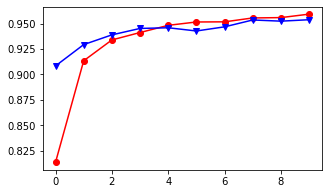

In [102]:
plt.figure(figsize=(5, 3))
plt.plot(history.epoch, history.history['accuracy'], marker='o', c='r')
plt.plot(history.epoch, history.history['val_accuracy'], marker='v', c='b')
plt.show();

In [79]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6546 - accuracy: 0.9461


[0.6545969843864441, 0.9460999965667725]

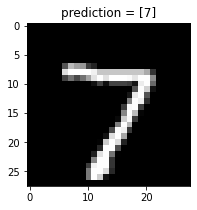

In [97]:
plt.figure(figsize=(3, 3))
plt.imshow(X_test[0], cmap='gray')
predict_label = model.predict(X_test[0][np.newaxis, :])
predict_label = tf.argmax(predict_label, axis=1)

plt.title(f'prediction = {predict_label}')

plt.show();

## Quickstart for expert

In [154]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = tf.expand_dims(X_train, -1)
X_test = tf.expand_dims(X_test, -1)

X_train = tf.cast(X_train, dtype=tf.float32)
X_test = tf.cast(X_test, dtype=tf.float32)

print(X_train.shape)

(60000, 28, 28, 1)


In [155]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

In [156]:
class MyModel(Model):
    def __init__(self, ):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(32, kernel_size=3, activation='relu')
        self.pool =  MaxPool2D(2)
        self.flatten = Flatten()
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.dense1(x)
        output = self.dense2(x)
        return output

model = MyModel()

In [157]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss') # loss mean 
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss') # loss mean 
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [161]:
def train_step(images, labels, model):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_fn(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

In [162]:
def test_step(images, labels, model):

    predictions = model(images, training=False)
    loss = loss_fn(labels, predictions)

    test_loss(loss)
    test_accuracy(labels, predictions)

In [163]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels, model)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels, model)

  print(
    f'Epoch {epoch + 1}, ',
    f'Loss: {train_loss.result()}, ',
    f'Accuracy: {train_accuracy.result() * 100}, ',
    f'Test Loss: {test_loss.result()}, ',
    f'Test Accuracy: {test_accuracy.result() * 100}')

Epoch 1,  Loss: 0.5457281470298767,  Accuracy: 93.91166687011719,  Test Loss: 0.10491327941417694,  Test Accuracy: 96.97999572753906
Epoch 2,  Loss: 0.07047776132822037,  Accuracy: 97.9183349609375,  Test Loss: 0.10328485071659088,  Test Accuracy: 97.27999877929688
Epoch 3,  Loss: 0.057260606437921524,  Accuracy: 98.288330078125,  Test Loss: 0.09690167009830475,  Test Accuracy: 97.37999725341797
Epoch 4,  Loss: 0.042133741080760956,  Accuracy: 98.68333435058594,  Test Loss: 0.09789884090423584,  Test Accuracy: 97.61000061035156
Epoch 5,  Loss: 0.0360015369951725,  Accuracy: 98.88500213623047,  Test Loss: 0.10449635237455368,  Test Accuracy: 97.64999389648438
